#### Check out the problem statement here: https://archive.ics.uci.edu/ml/machine-learning-databases/00421/aps_failure_description.txt

#### Task 1: Perform proper EDA, if any missing values are there try to fill them/remove them based on information that you get from EDA, find the correlation features and remove them from data, do some data cleaning if possible, etc. etc., you can do all sorts of data preprocessing and prepare data for models.

#### Task 2: Apply KNN on the data find the best k with 3-fold cross-validation and print the error metric value on the test data with the best k.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import confusion_matrix

C:\Users\GauravP\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv("ScaniaTrucksTrainingSet.csv")

In [3]:
data.head(3)

,Unnamed: 0,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,neg,76698,na,2130706438,280,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,1,neg,33058,na,0,na,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,2,neg,41040,na,228,100,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0


In [4]:
data = data.drop("Unnamed: 0", axis = 1)

In [5]:
data.head(3)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0


In [6]:
data["class"].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

In [7]:
columnsNames = list(data.columns.values)

### Removing all the columns where more than 80% of values are either 0 or 'na'.

In [8]:
#removing all the columns where more than 80% of values are either 0 or 'na'.
for i in columnsNames:
    count = 0
    s = data[i]
    for j in s:
        if j == '0' or j == 'na':
            count += 1
    if count >=48000:
        data.drop(i, axis = 1, inplace = True)

In [9]:
data.head()

,class,aa_000,ac_000,ad_000,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,...,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
0,neg,76698,2130706438,280,0,37250,1432864,3664156,1007684,25896,...,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0
1,neg,33058,0,na,0,18254,653294,1720800,516724,31642,...,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500
2,neg,41040,228,100,0,1648,370592,1883374,292936,12016,...,262032,453378,277378,159812,423992,409564,320746,158022,95128,514
3,neg,12,70,66,318,2212,3232,1872,0,0,...,5670,1566,240,46,58,44,10,0,0,0
4,neg,60874,1368,458,0,43752,1966618,1800340,131646,4588,...,404740,904230,622012,229790,405298,347188,286954,311560,433954,1218


In [10]:
data.shape

(60000, 129)

### Checking and removing for any missing values

In [11]:
columnsNames2 = list(data.columns.values)

In [12]:
len(columnsNames2)

129

In [13]:
#checking the number of columns where at least one value is missing.
count = 0
for k in columnsNames2:
    s = data[k]
    for j in s:
        if j == 'na':
            count += 1
            break
count

127

**There are 127 columns out of 129 where there is at least one missing value.**

**We have decided that we will replace missing values by median of every column because there are almost all the columns where there are missing values present, secondly median is not impacted by any outlier values in the columns.**

In [14]:
data.replace(to_replace = "na", value = "NaN", inplace = True)

In [15]:
data.head()

,class,aa_000,ac_000,ad_000,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,...,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
0,neg,76698,2130706438,280,0,37250,1432864,3664156,1007684,25896,...,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0
1,neg,33058,0,NaN,0,18254,653294,1720800,516724,31642,...,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500
2,neg,41040,228,100,0,1648,370592,1883374,292936,12016,...,262032,453378,277378,159812,423992,409564,320746,158022,95128,514
3,neg,12,70,66,318,2212,3232,1872,0,0,...,5670,1566,240,46,58,44,10,0,0,0
4,neg,60874,1368,458,0,43752,1966618,1800340,131646,4588,...,404740,904230,622012,229790,405298,347188,286954,311560,433954,1218


In [16]:
data["class"].replace(to_replace = "neg", value = "0", inplace = True)
data["class"].replace(to_replace = "pos", value = "1", inplace = True)

In [17]:
positiveData = data[(data["class"] == "1")]
positiveData.head()

,class,aa_000,ac_000,ad_000,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,...,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
9,1,153204,182,NaN,11804,684444,326536,31586,0,0,...,512878,293880,129862,26872,34044,22472,34362,0,0,0
23,1,453236,2926,NaN,323436,2999280,20657518,12530224,913700,12670,...,4079752,13176956,7908038,3026002,5025350,2025766,1160638,533834,493800,6914
60,1,72504,1594,1052,1249396,3813464,4876588,1202196,80186,5892,...,5935440,2161030,1432098,372252,527514,358274,332818,284178,3742,0
115,1,762958,NaN,NaN,8123016,18022646,17301098,6753568,649400,33662,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,1,695994,NaN,NaN,55620,1190014,2406704,2654968,190640,6104,...,1073478,3141688,1397742,495544,361646,28610,5130,212,0,0


In [18]:
positiveData.shape

(1000, 129)

In [19]:
positiveDataLabel = positiveData["class"]

In [20]:
positiveDataLabel.shape

(1000,)

In [21]:
positiveData.shape

(1000, 129)

In [22]:
negativeData = data[(data["class"] == "0")]
negativeData.head()

,class,aa_000,ac_000,ad_000,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,...,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
0,0,76698,2130706438,280,0,37250,1432864,3664156,1007684,25896,...,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0
1,0,33058,0,NaN,0,18254,653294,1720800,516724,31642,...,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500
2,0,41040,228,100,0,1648,370592,1883374,292936,12016,...,262032,453378,277378,159812,423992,409564,320746,158022,95128,514
3,0,12,70,66,318,2212,3232,1872,0,0,...,5670,1566,240,46,58,44,10,0,0,0
4,0,60874,1368,458,0,43752,1966618,1800340,131646,4588,...,404740,904230,622012,229790,405298,347188,286954,311560,433954,1218


In [23]:
negativeData.shape

(59000, 129)

In [24]:
negativeDataLabel = negativeData["class"]

In [25]:
negativeDataLabel.shape

(59000,)

In [26]:
negativeData.head()

,class,aa_000,ac_000,ad_000,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,...,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
0,0,76698,2130706438,280,0,37250,1432864,3664156,1007684,25896,...,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0
1,0,33058,0,NaN,0,18254,653294,1720800,516724,31642,...,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500
2,0,41040,228,100,0,1648,370592,1883374,292936,12016,...,262032,453378,277378,159812,423992,409564,320746,158022,95128,514
3,0,12,70,66,318,2212,3232,1872,0,0,...,5670,1566,240,46,58,44,10,0,0,0
4,0,60874,1368,458,0,43752,1966618,1800340,131646,4588,...,404740,904230,622012,229790,405298,347188,286954,311560,433954,1218


In [27]:
negativeData.shape

(59000, 129)

In [28]:
missingImputation = Imputer(missing_values = "NaN", strategy = "median", axis = 0, copy = False)

p = missingImputation.fit_transform(positiveData)

n = missingImputation.fit_transform(negativeData)


In [29]:
Data_P = pd.DataFrame(p, columns=columnsNames2)
Data_P.head()

,class,aa_000,ac_000,ad_000,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,...,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
0,1.0,153204.0,182.0,648.0,11804.0,684444.0,326536.0,31586.0,0.0,0.0,...,512878.0,293880.0,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0
1,1.0,453236.0,2926.0,648.0,323436.0,2999280.0,20657518.0,12530224.0,913700.0,12670.0,...,4079752.0,13176956.0,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0
2,1.0,72504.0,1594.0,1052.0,1249396.0,3813464.0,4876588.0,1202196.0,80186.0,5892.0,...,5935440.0,2161030.0,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0
3,1.0,762958.0,865.0,648.0,8123016.0,18022646.0,17301098.0,6753568.0,649400.0,33662.0,...,6009488.0,5033236.0,2949986.0,1295384.0,2591636.0,2717748.0,2185156.0,911552.0,64248.0,8.0
4,1.0,695994.0,865.0,648.0,55620.0,1190014.0,2406704.0,2654968.0,190640.0,6104.0,...,1073478.0,3141688.0,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0


In [30]:
Data_P.shape

(1000, 129)

In [31]:
Data_N = pd.DataFrame(n, columns=columnsNames2)
Data_N.head()

,class,aa_000,ac_000,ad_000,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,...,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
0,0.0,76698.0,2.130706e+09,280.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,...,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0
1,0.0,33058.0,0.000000e+00,124.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,...,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0
2,0.0,41040.0,2.280000e+02,100.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,...,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0
3,0.0,12.0,7.000000e+01,66.0,318.0,2212.0,3232.0,1872.0,0.0,0.0,...,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0
4,0.0,60874.0,1.368000e+03,458.0,0.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,...,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0


In [32]:
Data_N.shape

(59000, 129)

In [33]:
Data_P_Labels = positiveDataLabel

In [34]:
Data_N_Labels = negativeDataLabel

### Oversampling minority class points using SMOTE

In [35]:
Data = [Data_P, Data_N]
FinalData = pd.concat(Data)

In [36]:
FinalData.shape

(60000, 129)

In [37]:
FinalDataLabels = FinalData["class"]

In [38]:
FinalDataLabels.shape

(60000,)

In [39]:
# Oversampling minority class points, here minority class points are 1
sm = SMOTE(ratio = "minority")
FData, FDataL = sm.fit_sample(FinalData, FinalDataLabels)

In [40]:
FinalDataFrame = pd.DataFrame(FData, columns=columnsNames2)

In [41]:
FinalDataFrame.head()

,class,aa_000,ac_000,ad_000,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,...,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
0,1.0,153204.0,182.0,648.0,11804.0,684444.0,326536.0,31586.0,0.0,0.0,...,512878.0,293880.0,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0
1,1.0,453236.0,2926.0,648.0,323436.0,2999280.0,20657518.0,12530224.0,913700.0,12670.0,...,4079752.0,13176956.0,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0
2,1.0,72504.0,1594.0,1052.0,1249396.0,3813464.0,4876588.0,1202196.0,80186.0,5892.0,...,5935440.0,2161030.0,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0
3,1.0,762958.0,865.0,648.0,8123016.0,18022646.0,17301098.0,6753568.0,649400.0,33662.0,...,6009488.0,5033236.0,2949986.0,1295384.0,2591636.0,2717748.0,2185156.0,911552.0,64248.0,8.0
4,1.0,695994.0,865.0,648.0,55620.0,1190014.0,2406704.0,2654968.0,190640.0,6104.0,...,1073478.0,3141688.0,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0


In [42]:
FinalDataFrame.shape

(118000, 129)

In [43]:
FinalDataFrame["class"].value_counts()

0.0    59000
1.0    59000
Name: class, dtype: int64

### Preparing data for KNN

In [132]:
Data_Positive = FinalDataFrame[(FinalDataFrame["class"] == 1)]
Data_Positive.shape

(59000, 129)

In [133]:
Data_Positive.head()

,class,aa_000,ac_000,ad_000,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,...,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
0,1.0,153204.0,182.0,648.0,11804.0,684444.0,326536.0,31586.0,0.0,0.0,...,512878.0,293880.0,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0
1,1.0,453236.0,2926.0,648.0,323436.0,2999280.0,20657518.0,12530224.0,913700.0,12670.0,...,4079752.0,13176956.0,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0
2,1.0,72504.0,1594.0,1052.0,1249396.0,3813464.0,4876588.0,1202196.0,80186.0,5892.0,...,5935440.0,2161030.0,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0
3,1.0,762958.0,865.0,648.0,8123016.0,18022646.0,17301098.0,6753568.0,649400.0,33662.0,...,6009488.0,5033236.0,2949986.0,1295384.0,2591636.0,2717748.0,2185156.0,911552.0,64248.0,8.0
4,1.0,695994.0,865.0,648.0,55620.0,1190014.0,2406704.0,2654968.0,190640.0,6104.0,...,1073478.0,3141688.0,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0


In [134]:
Data_Negative = FinalDataFrame[(FinalDataFrame["class"] == 0)]
Data_Negative.shape

(59000, 129)

In [135]:
Data_Negative.head()

,class,aa_000,ac_000,ad_000,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,...,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
1000,0.0,76698.0,2.130706e+09,280.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,...,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0
1001,0.0,33058.0,0.000000e+00,124.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,...,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0
1002,0.0,41040.0,2.280000e+02,100.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,...,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0
1003,0.0,12.0,7.000000e+01,66.0,318.0,2212.0,3232.0,1872.0,0.0,0.0,...,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0
1004,0.0,60874.0,1.368000e+03,458.0,0.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,...,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0


In [136]:
DataPos_15000 = Data_Positive.sample(n = 15000)

In [137]:
DataNeg_15000 = Data_Negative.sample(n = 15000)

In [138]:
DataPos_15000.shape

(15000, 129)

In [139]:
DataPos_15000.head()

,class,aa_000,ac_000,ad_000,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,...,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
81218,1.0,1.494198e+05,1.778590e+02,648.000000,1.177915e+04,6.870984e+05,3.251515e+05,3.096687e+04,0.000000e+00,0.000000,...,5.049589e+05,2.976621e+05,1.307277e+05,2.729247e+04,3.483546e+04,2.274186e+04,3.519880e+04,1.571084e+03,7.591831,0.000000
86140,1.0,4.763215e+05,3.436523e+03,756.760788,2.447991e+06,1.102854e+07,1.223043e+07,4.988475e+06,9.061730e+05,133638.508502,...,6.310775e+06,4.781093e+06,3.195076e+06,1.442206e+06,2.344205e+06,2.665117e+06,3.503308e+06,7.540806e+06,47844.091097,485.006308
114492,1.0,1.213083e+06,8.650000e+02,1508.037691,1.289285e+07,2.792823e+07,2.743353e+07,1.062235e+07,1.410307e+06,69790.901917,...,3.076255e+07,9.346858e+06,5.358375e+06,2.582668e+06,5.664103e+06,9.623107e+06,1.315686e+07,5.311156e+06,265828.171408,0.000000
67541,1.0,5.190656e+05,2.130706e+09,2358.515683,9.881441e+04,1.004915e+06,4.853180e+06,2.910575e+06,3.478002e+05,13495.221876,...,1.111976e+06,1.357432e+06,1.031355e+06,5.713051e+05,1.339100e+06,1.903012e+06,1.255285e+06,3.890991e+05,278079.186513,5149.417050
112247,1.0,4.642031e+05,8.650000e+02,648.000000,6.310447e+06,1.309735e+07,1.166156e+07,4.062291e+06,4.986206e+05,59952.037237,...,8.762557e+06,8.099050e+06,4.432442e+06,1.707404e+06,3.283414e+06,2.707784e+06,2.554745e+06,5.387335e+06,172241.450603,20.348861


In [140]:
DataNeg_15000.shape

(15000, 129)

In [141]:
DataNeg_15000.head()

,class,aa_000,ac_000,ad_000,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,...,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
27007,0.0,26372.0,5.600000e+02,410.0,0.0,1516.0,246316.0,1373796.0,307328.0,14846.0,...,385000.0,344826.0,222472.0,115250.0,359394.0,355874.0,129580.0,28750.0,5812.0,10.0
18113,0.0,400862.0,1.632000e+03,1236.0,95026.0,2452630.0,2298754.0,1633864.0,388904.0,46590.0,...,1097444.0,1022208.0,985352.0,331808.0,564666.0,471358.0,467758.0,1931050.0,46354.0,0.0
34412,0.0,224096.0,2.984000e+03,874.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48096,0.0,40018.0,2.130706e+09,150.0,0.0,684.0,222622.0,1506398.0,369396.0,11020.0,...,229364.0,195842.0,160766.0,105592.0,214936.0,208510.0,242188.0,242352.0,497686.0,13008.0
27408,0.0,3658.0,0.000000e+00,124.0,0.0,206.0,15114.0,225510.0,12962.0,0.0,...,34444.0,53318.0,18760.0,12886.0,61102.0,57346.0,13696.0,2188.0,52.0,0.0


In [142]:
frame_30000 = [DataPos_15000, DataNeg_15000]
FinalProcessed_30000 = pd.concat(frame_30000)

In [143]:
# Sorting the dataframe on any random column so as to shuffle the data
FinalProcessed_30000.sort_values('ee_001', axis=0, ascending=True, inplace=True)

In [144]:
FinalProcessed_30000.shape

(30000, 129)

In [145]:
FinalProcessed_30000["class"].value_counts()

0.0    15000
1.0    15000
Name: class, dtype: int64

In [146]:
FinalProcessed_30000.head()

,class,aa_000,ac_000,ad_000,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,...,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
106532,1.0,1.101473e+06,865.000000,8592.129023,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232,1.0,3.545980e+05,0.000000,4648.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7786,0.0,8.416020e+05,150.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93112,1.0,3.742371e+05,2419.969727,3288.335643,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67474,1.0,9.513944e+05,1314.492846,196.317704,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
FinalProcessed_30000_lables = FinalProcessed_30000["class"]

In [148]:
FinalProcessed_30000 = FinalProcessed_30000.drop("class", axis = 1)

In [149]:
FinalProcessed_30000.shape

(30000, 128)

In [150]:
FinalProcessed_30000.head()

,aa_000,ac_000,ad_000,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,...,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
106532,1.101473e+06,865.000000,8592.129023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232,3.545980e+05,0.000000,4648.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7786,8.416020e+05,150.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93112,3.742371e+05,2419.969727,3288.335643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67474,9.513944e+05,1314.492846,196.317704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
FinalProcessed_30000_Std = StandardScaler().fit_transform(FinalProcessed_30000)
print(FinalProcessed_30000_Std.shape)
print(type(FinalProcessed_30000_Std))

(30000, 128)
<class 'numpy.ndarray'>


In [152]:
neighbors = []
for i in range(1001, 10501, 500):
    neighbors.append(i)

In [153]:
CV_Scores = []

for k in neighbors:
    KNN = KNeighborsClassifier(n_neighbors = k, algorithm = 'brute')
    scores = cross_val_score(KNN, FinalProcessed_30000_Std, FinalProcessed_30000_lables, cv = 3, scoring='accuracy')
    CV_Scores.append(scores.mean())

In [154]:
best_k = neighbors[CV_Scores.index(max(CV_Scores))]
best_k

1001

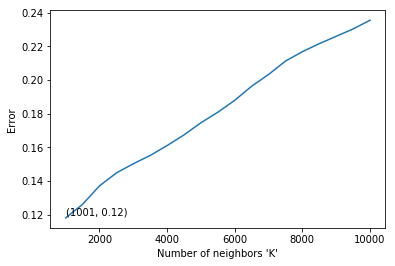

In [155]:
error = []

for a in CV_Scores:
    x = 1 - a
    error.append(x)
    
plt.plot(neighbors, error)

minError1 = min(error)
minError = np.round(minError1, 2)

plt.xlabel("Number of neighbors 'K'")
plt.ylabel("Error")
for xy in zip(neighbors, np.round(error,2)):
    if xy == (best_k, minError):
        plt.annotate(xy,xy)

plt.show()

### Preparing Test data for KNN

In [64]:
Data_Test = pd.read_csv("ScaniaTrucksTestSet.csv")

In [65]:
Data_Test.head(3)

,Unnamed: 0,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,neg,60,0,20,12,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,1,neg,82,0,68,40,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,2,neg,66002,2,212,112,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0


In [66]:
Data_Test = Data_Test.drop("Unnamed: 0", axis = 1)

In [67]:
Data_Test.head(3)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0


In [68]:
Data_Test.shape

(16000, 171)

In [69]:
Data_Test["class"].value_counts()

neg    15625
pos      375
Name: class, dtype: int64

In [70]:
columnsNamesTest = list(Data_Test.columns.values)

### Removing all the columns where more than 80% of values are either 0 or 'na'.

In [71]:
#removing all the columns where more than 80% of values are either 0 or 'na'.
for i in columnsNamesTest:
    count = 0
    s = Data_Test[i]
    for j in s:
        if j == '0' or j == 'na':
            count += 1
    if count >=12800:
        Data_Test.drop(i, axis = 1, inplace = True)

In [72]:
Data_Test.head()

,class,aa_000,ac_000,ad_000,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,...,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
0,neg,60,20,12,2682,4736,3862,1846,0,0,...,7502,3156,1098,138,412,654,78,88,0,0
1,neg,82,68,40,0,748,12594,3636,0,0,...,10040,3310,1068,276,1620,116,86,462,0,0
2,neg,66002,212,112,199486,1358536,1952422,452706,25130,520,...,396312,538136,495076,380368,440134,269556,1315022,153680,516,0
3,neg,59816,1010,936,0,123922,984314,1680050,1135268,92606,...,659550,691580,540820,243270,483302,485332,431376,210074,281662,3232
4,neg,1814,156,140,0,72,17926,82834,3114,0,...,10216,9958,7646,4144,18466,49782,3176,482,76,0


In [73]:
Data_Test.shape

(16000, 129)

### Checking and removing for any missing values

In [74]:
columnsNamesTest2 = list(Data_Test.columns.values)

In [75]:
len(columnsNamesTest2)

129

In [76]:
#checking the number of columns where at least one value is missing.
count = 0
for k in columnsNamesTest2:
    s = Data_Test[k]
    for j in s:
        if j == 'na':
            count += 1
            break
count

127

**There are 127 columns out of 129 where there is at least one missing value.**

**We have decided that we will replace missing values by median of every column because there are almost all the columns where there are missing values present, secondly median is not impacted by any outlier values in the columns.**

In [77]:
Data_Test.replace(to_replace = "na", value = "NaN", inplace = True)

In [78]:
Data_Test.head()

,class,aa_000,ac_000,ad_000,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,...,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
0,neg,60,20,12,2682,4736,3862,1846,0,0,...,7502,3156,1098,138,412,654,78,88,0,0
1,neg,82,68,40,0,748,12594,3636,0,0,...,10040,3310,1068,276,1620,116,86,462,0,0
2,neg,66002,212,112,199486,1358536,1952422,452706,25130,520,...,396312,538136,495076,380368,440134,269556,1315022,153680,516,0
3,neg,59816,1010,936,0,123922,984314,1680050,1135268,92606,...,659550,691580,540820,243270,483302,485332,431376,210074,281662,3232
4,neg,1814,156,140,0,72,17926,82834,3114,0,...,10216,9958,7646,4144,18466,49782,3176,482,76,0


In [79]:
Data_Test["class"].replace(to_replace = "neg", value = "0", inplace = True)
Data_Test["class"].replace(to_replace = "pos", value = "1", inplace = True)

In [80]:
positiveData = Data_Test[(Data_Test["class"] == "1")]
positiveData.head()

,class,aa_000,ac_000,ad_000,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,...,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
42,1,1800546,NaN,13042,7875494,55386332,92749198,52130878,16496844,1901366,...,95928594,50515302,30997662,7611880,9706814,7087194,24679144,121822,52624,0
100,1,715316,NaN,NaN,0,81318,5510544,20428832,4250614,17578,...,3703656,5965794,3905674,1753622,3247762,2700712,2902338,2787064,3187202,135060
426,1,1055714,NaN,NaN,130,196186,10992134,41971684,13090340,141034,...,8667474,11120294,7651830,3968726,9587618,8521170,6513690,3988408,6064958,307808
428,1,27304,512,486,576480,1880082,263386,26422,320,0,...,863860,716650,241924,99820,216566,203724,226244,170430,7472,0
434,1,1520540,NaN,NaN,60,383930,13556044,62966486,19296738,230176,...,8629518,18241104,12830228,7287542,21196940,12907126,7005504,3584098,4639484,113974


In [81]:
positiveData.shape

(375, 129)

In [82]:
positiveDataLabel = positiveData["class"]

In [83]:
positiveDataLabel.shape

(375,)

In [84]:
negativeData = Data_Test[(Data_Test["class"] == "0")]
negativeData.head()

,class,aa_000,ac_000,ad_000,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,...,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
0,0,60,20,12,2682,4736,3862,1846,0,0,...,7502,3156,1098,138,412,654,78,88,0,0
1,0,82,68,40,0,748,12594,3636,0,0,...,10040,3310,1068,276,1620,116,86,462,0,0
2,0,66002,212,112,199486,1358536,1952422,452706,25130,520,...,396312,538136,495076,380368,440134,269556,1315022,153680,516,0
3,0,59816,1010,936,0,123922,984314,1680050,1135268,92606,...,659550,691580,540820,243270,483302,485332,431376,210074,281662,3232
4,0,1814,156,140,0,72,17926,82834,3114,0,...,10216,9958,7646,4144,18466,49782,3176,482,76,0


In [85]:
negativeData.shape

(15625, 129)

In [86]:
negativeDataLabel = negativeData["class"]

In [87]:
negativeDataLabel.shape

(15625,)

In [88]:
negativeData.head()

,class,aa_000,ac_000,ad_000,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,...,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
0,0,60,20,12,2682,4736,3862,1846,0,0,...,7502,3156,1098,138,412,654,78,88,0,0
1,0,82,68,40,0,748,12594,3636,0,0,...,10040,3310,1068,276,1620,116,86,462,0,0
2,0,66002,212,112,199486,1358536,1952422,452706,25130,520,...,396312,538136,495076,380368,440134,269556,1315022,153680,516,0
3,0,59816,1010,936,0,123922,984314,1680050,1135268,92606,...,659550,691580,540820,243270,483302,485332,431376,210074,281662,3232
4,0,1814,156,140,0,72,17926,82834,3114,0,...,10216,9958,7646,4144,18466,49782,3176,482,76,0


In [89]:
negativeData.shape

(15625, 129)

In [90]:
missingImputation = Imputer(missing_values = "NaN", strategy = "median", axis = 0, copy = False)

p = missingImputation.fit_transform(positiveData)

n = missingImputation.fit_transform(negativeData)

In [91]:
Data_P_Test = pd.DataFrame(p, columns=columnsNamesTest2)
Data_P_Test.head()

,class,aa_000,ac_000,ad_000,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,...,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
0,1.0,1800546.0,808.0,13042.0,7875494.0,55386332.0,92749198.0,52130878.0,16496844.0,1901366.0,...,95928594.0,50515302.0,30997662.0,7611880.0,9706814.0,7087194.0,24679144.0,121822.0,52624.0,0.0
1,1.0,715316.0,808.0,730.0,0.0,81318.0,5510544.0,20428832.0,4250614.0,17578.0,...,3703656.0,5965794.0,3905674.0,1753622.0,3247762.0,2700712.0,2902338.0,2787064.0,3187202.0,135060.0
2,1.0,1055714.0,808.0,730.0,130.0,196186.0,10992134.0,41971684.0,13090340.0,141034.0,...,8667474.0,11120294.0,7651830.0,3968726.0,9587618.0,8521170.0,6513690.0,3988408.0,6064958.0,307808.0
3,1.0,27304.0,512.0,486.0,576480.0,1880082.0,263386.0,26422.0,320.0,0.0,...,863860.0,716650.0,241924.0,99820.0,216566.0,203724.0,226244.0,170430.0,7472.0,0.0
4,1.0,1520540.0,808.0,730.0,60.0,383930.0,13556044.0,62966486.0,19296738.0,230176.0,...,8629518.0,18241104.0,12830228.0,7287542.0,21196940.0,12907126.0,7005504.0,3584098.0,4639484.0,113974.0


In [92]:
Data_P_Test.shape

(375, 129)

In [93]:
Data_N_Test = pd.DataFrame(n, columns=columnsNamesTest2)
Data_N_Test.head()

,class,aa_000,ac_000,ad_000,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,...,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
0,0.0,60.0,20.0,12.0,2682.0,4736.0,3862.0,1846.0,0.0,0.0,...,7502.0,3156.0,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0
1,0.0,82.0,68.0,40.0,0.0,748.0,12594.0,3636.0,0.0,0.0,...,10040.0,3310.0,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0
2,0.0,66002.0,212.0,112.0,199486.0,1358536.0,1952422.0,452706.0,25130.0,520.0,...,396312.0,538136.0,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0
3,0.0,59816.0,1010.0,936.0,0.0,123922.0,984314.0,1680050.0,1135268.0,92606.0,...,659550.0,691580.0,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0
4,0.0,1814.0,156.0,140.0,0.0,72.0,17926.0,82834.0,3114.0,0.0,...,10216.0,9958.0,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0


In [94]:
Data_N_Test.shape

(15625, 129)

In [95]:
Data_P_Test_Labels = positiveDataLabel
Data_N_Test_Labels = negativeDataLabel

In [96]:
frame_Test = [Data_P_Test, Data_N_Test]

In [97]:
FinalProcessed_Test_Data = pd.concat(frame_Test)

In [98]:
FinalProcessed_Test_Data.shape

(16000, 129)

In [99]:
# Sorting the dataframe on any random column
FinalProcessed_Test_Data.sort_values('ee_001', axis=0, ascending=True, inplace=True)

In [100]:
FinalProcessed_Test_Data.shape

(16000, 129)

In [101]:
FinalProcessed_Test_Data["class"].value_counts()

0.0    15625
1.0      375
Name: class, dtype: int64

In [102]:
FinalProcessed_Test_Data.head()

,class,aa_000,ac_000,ad_000,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,...,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
11589,0.0,26.0,102.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6524,0.0,1470234.0,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11761,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
335,1.0,669782.0,808.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10373,0.0,940.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
FinalProcessed_Test_Data_lables = FinalProcessed_Test_Data["class"]

In [104]:
FinalProcessed_Test_Data = FinalProcessed_Test_Data.drop("class", axis = 1)

In [105]:
FinalProcessed_Test_Data.shape

(16000, 128)

In [106]:
FinalProcessed_Test_Data.head()

,aa_000,ac_000,ad_000,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,...,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
11589,26.0,102.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6524,1470234.0,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11761,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
335,669782.0,808.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10373,940.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
FinalProcessed_Test_Data_Std = StandardScaler().fit_transform(FinalProcessed_Test_Data)
print(FinalProcessed_Test_Data_Std.shape)
print(type(FinalProcessed_Test_Data_Std))

(16000, 128)
<class 'numpy.ndarray'>


In [157]:
KNN_best = KNeighborsClassifier(n_neighbors = 4501, algorithm = 'brute')

KNN_best.fit(FinalProcessed_30000_Std, FinalProcessed_30000_lables)

prediction = KNN_best.predict(FinalProcessed_Test_Data_Std)

accuracyTest = accuracy_score(FinalProcessed_Test_Data_lables, prediction) * 100

print("Accuracy of the knn classifier for best k values of 4501 is: "+str(accuracyTest)+"%")

Accuracy of the knn classifier for best k values of 4501 is: 79.9625%


In [158]:
confusion_matrix(FinalProcessed_Test_Data_lables, prediction)

array([[12421,  3204],
       [    2,   373]], dtype=int64)

 Cost-metric of miss-classification:

     Predicted class |      True class       |
                     |    pos    |    neg    |
     -----------------------------------------
      pos            |     -     |  Cost_1   |
     -----------------------------------------
      neg            |  Cost_2   |     -     |
     -----------------------------------------

**Total_cost = Cost_1*No_Instances + Cost_2*No_Instances.**

Cost_1 = 10

Cost_2 = 500

In [161]:
TotalCostMetric = 10*3210 + 500*2
print("Cost metric score for best k value of 4501 = "+str(TotalCostMetric))

Cost metric score for best k value of 4501 = 33100
